In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import IPython.display as display
import socket
import pandas
from pandas import DataFrame
from hsa import emu_connect
import importlib
from ipywidgets import widgets

In [2]:
# hack to import modules in pycharm and browser
import sys
sys.path.append("../")

In [2]:
%matplotlib inline

In [3]:
prim_soc = socket.create_connection(("localhost", 9090))
prim_soc

<socket.socket fd=37, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 50396), raddr=('127.0.0.1', 9090)>

In [4]:
importlib.reload(emu_connect)
emu = emu_connect.Emu2(prim_soc)

In [10]:
emu.close()

'true\n'

In [11]:
emu.step()

'true\n'

In [11]:
basic_ram = emu.get_ram()

In [35]:
emu.play_beginning()

'true\n'

In [ ]:
emu.speed_mode("maximum")

In [22]:
emu.play_movie()

True

In [ ]:
def visualize_ram(ram_bytes):
    return plt.imshow(np.frombuffer(ram_bytes, dtype=np.dtype(np.uint8)).reshape((32,64))
               ,vmin=0,vmax=255,interpolation="nearest",cmap=plt.get_cmap('binary'))

In [ ]:
for _ in range(4):
    for _ in range(60):
        emu.step()
    visualize_ram(emu.get_ram())
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [5]:
# Just run the emulator for a bit
for i in range(240):
    emu.step()

In [14]:
def mario_x_from_ram(ram):
    return ram[0x86]

In [ ]:
"""Outdated"""
tex = widgets.Text(value='Hello World!', disabled=True) 
display.display(tex)
for frame in play_movie(emu):
    tex.value = str(mario_x_from_ram(frame))

In [6]:
ram_frames, inputs_list = emu.play_movie_with_output()

In [7]:
ram_frames_df = DataFrame.from_records(ram_frames)
inputs_df = DataFrame.from_dict(inputs_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f794d8908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f67b683c8>]], dtype=object)

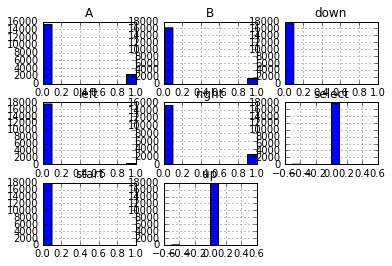

In [8]:
inputs_df.hist()

In [9]:
# Save Dataframes to disk
inputs_df.to_hdf("warpless.hdf","inputs")
ram_frames_df.to_hdf("warpless.hdf","rams")

In [25]:
pandas.read_hdf("mario_1_1_first.hdf", key="inputs")

,A,B,down,left,right,select,start,up
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False
